In [1]:
!pip install contractions
!pip install emoji
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 9.7 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [2]:
import contractions
import emoji
import time
import string 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sn
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords, wordnet
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
# Gensim (Word2Vec, Doc2Vec)
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import Word2Vec

# SKlearn
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay, accuracy_score, classification_report, silhouette_score, calinski_harabasz_score, accuracy_score
from sklearn.datasets import load_files
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import TruncatedSVD 
from sklearn.cluster import KMeans
#from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import confusion_matrix
from keras.preprocessing.text import Tokenizer
from keras.layers import LSTM,Dense,Dropout,Embedding,CuDNNLSTM,Bidirectional
from keras.layers import Embedding
from keras.models import Model, Sequential
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
import keras

In [4]:
# Remove emojis 
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF" 
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def remove_stopwords(reviews):
    STOPWORDS = stopwords.words('english')
    STOPWORDS.remove('not')
    STOPWORDS.remove('is')
    STOPWORDS.remove('but')
    if STOPWORDS is None:
        STOPWORDS = set(stopwords.words('english'))
    return ' '.join([word for word in reviews.split() if word not in STOPWORDS])

def remove_extra_whitespace(reviews):
    return " ".join(reviews.split())

def get_wordnet_pos(text):
    # Map POS tag to first character lemmatize() accepts
    tags = nltk.pos_tag(text)
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    tags = [tag_dict.get(tag[1][0],  wordnet.NOUN) for tag in tags]
    return tags

def lemmaSentence(reviews):
    lemmatizer = WordNetLemmatizer()
    lemma_text = ''
    tok_text = word_tokenize(reviews)
    tags = get_wordnet_pos(tok_text)
    for i in range(len(tok_text)):
        lemma_text = lemma_text + ' ' + lemmatizer.lemmatize(tok_text[i], tags[i])
    return lemma_text[1:]

def lower_case(review):
    
    return review.lower()

# change contraction words such sa I'm = I am, shouldn't = should not
def change_contractions(review):
    
    expanded_words = [contractions.fix(word) for word in review.split()]

    expanded_review = ' '.join(expanded_words)
    return expanded_review

# Remove Punctuations
def remove_punctuations(review):
    
    new_review = review.translate(str.maketrans('', '', string.punctuation))
    return new_review

# Remove numbers
def remove_numbers(review):
    
    mapping = str.maketrans('', '', string.digits)
    new_review = review.translate(mapping)
    
    return new_review

In [5]:

def clean_text(data):

    data['concat_review'] = data['concat_review'].apply(lower_case)
    data['concat_review'] = data['concat_review'].apply(change_contractions)
    data['concat_review'] = data['concat_review'].apply(remove_emojis)
    data['concat_review'] = data['concat_review'].apply(remove_punctuations)
    data['concat_review'] = data['concat_review'].apply(remove_numbers)
    data['concat_review'] = data['concat_review'].apply(remove_stopwords)
    data['concat_review'] = data['concat_review'].apply(remove_extra_whitespace)
    data['concat_review'] = data['concat_review'].apply(lemmaSentence)
    
    return data

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [8]:
test_df_bryson = pd.read_csv('train_test_dataset/test_df_Bryson.csv')
test_df_kelvin = pd.read_csv('train_test_dataset/test_df_Kelvin.csv')
test_df_Gx =  pd.read_csv('train_test_dataset/test_df_Gx.csv')
df_list = [test_df_bryson, test_df_kelvin, test_df_Gx]
test_df = pd.concat(df_list,ignore_index=True)


In [9]:
test_df

,Unnamed: 0,Unnamed: 0.1,productAsin,ratingScore,reviewTitle,reviewReaction,reviewDescription,isVerified,category,languages,Annotator_1,Annotator_2,Unnamed: 0.1.1
0,0,24031,1982137452,1,The content is all messed up,NaN,I started this book this week for my book club...,True,children,Language.ENGLISH,-1,-1,NaN
1,1,22332,125030170X,1,Duplicate copy.Damaged book.,NaN,Pages missing.,True,children,Language.ENGLISH,-1,-1,NaN
2,2,23579,63215381,1,Awful,NaN,I gave up after 38% of my Kindle. Yes we were ...,True,children,Language.ENGLISH,-1,-1,NaN
3,3,20346,60935464,1,Syrupy Overload,3,The book is an example of leading the witness.,True,children,Language.ENGLISH,-1,-1,NaN
4,4,22874,1501161938,1,Couldn‚Äôt read it; type too small!,1,"Beware, the type is TINY, I mean TINY. I am 60...",True,children,Language.ENGLISH,-1,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325,773,773,399226907,5,Perfect Little Board Book,NaN,"I purchased the board book version, which is t...",True,children,Language.ENGLISH,1,1,5161.0
2326,774,774,1542046599,5,Twists and Turns Abound,NaN,"A great suspenseful, ""Who Done It"". I couldn'...",True,mystery,Language.ENGLISH,1,1,10559.0
2327,775,775,B01M0JHBEG,5,we love lift the flaps!,NaN,"This book is a lot of fun for Halloween, with ...",True,children,Language.ENGLISH,1,1,7199.0
2328,776,776,141501596,5,Books ~ the Knowledge Source,NaN,"""June & Jack must read three books before they...",True,children,Language.ENGLISH,1,1,8504.0


In [10]:
test_df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'], inplace = True)
test_df

,productAsin,ratingScore,reviewTitle,reviewReaction,reviewDescription,isVerified,category,languages,Annotator_1,Annotator_2,Unnamed: 0.1.1
0,1982137452,1,The content is all messed up,NaN,I started this book this week for my book club...,True,children,Language.ENGLISH,-1,-1,NaN
1,125030170X,1,Duplicate copy.Damaged book.,NaN,Pages missing.,True,children,Language.ENGLISH,-1,-1,NaN
2,63215381,1,Awful,NaN,I gave up after 38% of my Kindle. Yes we were ...,True,children,Language.ENGLISH,-1,-1,NaN
3,60935464,1,Syrupy Overload,3,The book is an example of leading the witness.,True,children,Language.ENGLISH,-1,-1,NaN
4,1501161938,1,Couldn‚Äôt read it; type too small!,1,"Beware, the type is TINY, I mean TINY. I am 60...",True,children,Language.ENGLISH,-1,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2325,399226907,5,Perfect Little Board Book,NaN,"I purchased the board book version, which is t...",True,children,Language.ENGLISH,1,1,5161.0
2326,1542046599,5,Twists and Turns Abound,NaN,"A great suspenseful, ""Who Done It"". I couldn'...",True,mystery,Language.ENGLISH,1,1,10559.0
2327,B01M0JHBEG,5,we love lift the flaps!,NaN,"This book is a lot of fun for Halloween, with ...",True,children,Language.ENGLISH,1,1,7199.0
2328,141501596,5,Books ~ the Knowledge Source,NaN,"""June & Jack must read three books before they...",True,children,Language.ENGLISH,1,1,8504.0


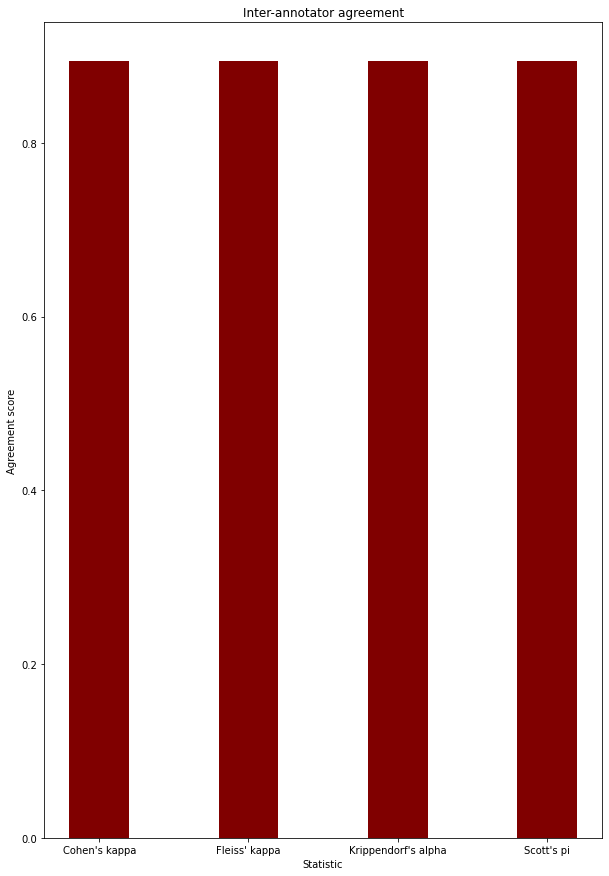

In [11]:
## Interannotator agreement

from nltk import agreement
import matplotlib.pyplot as plt

annotator_1 = test_df["Annotator_1"].to_numpy()
annotator_2 = test_df["Annotator_2"].to_numpy()

taskdata=[[0,str(i),str(annotator_1[i])] for i in range(0,len(annotator_1))]+[[1,str(i),str(annotator_2[i])] for i in range(0,len(annotator_2))]
ratingtask = agreement.AnnotationTask(data=taskdata)

cohen_kappa = ratingtask.kappa()
fleiss_kappa = ratingtask.multi_kappa()
krippendorf_alpha = ratingtask.alpha()
scotts_pi = ratingtask.pi()

scores = {"Cohen's kappa": cohen_kappa, "Fleiss' kappa": fleiss_kappa, "Krippendorf's alpha": krippendorf_alpha, "Scott's pi" : scotts_pi}

statistic = list(scores.keys())
values = list(scores.values())

fig = plt.figure(figsize = (10, 15))
plt.bar(statistic, values, color ='maroon',
        width = 0.4)
plt.xlabel("Statistic")
plt.ylabel("Agreement score")
plt.title("Inter-annotator agreement")
plt.show()

In [12]:
print(cohen_kappa)

0.8939596693834795


In [13]:
test_df['concat_review'] = test_df['reviewTitle'] + '. ' + test_df['reviewDescription']
test_df = clean_text(test_df)

In [14]:
train_data = pd.read_csv('train_test_dataset/train_df_imbalanced.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20961 entries, 0 to 20960
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         20961 non-null  int64 
 1   productAsin        20961 non-null  object
 2   ratingScore        20961 non-null  int64 
 3   reviewTitle        20960 non-null  object
 4   reviewReaction     5883 non-null   object
 5   reviewDescription  20961 non-null  object
 6   isVerified         20961 non-null  bool  
 7   category           20961 non-null  object
 8   languages          20961 non-null  object
 9   concat_review      20961 non-null  object
 10  polarity           20961 non-null  int64 
dtypes: bool(1), int64(3), object(7)
memory usage: 1.6+ MB


In [15]:
# Pre-processing of datafame
clean_train_data_df = clean_text(train_data)
clean_train_data_df

,Unnamed: 0,productAsin,ratingScore,reviewTitle,reviewReaction,reviewDescription,isVerified,category,languages,concat_review,polarity
0,9406,B08NLXR9V5,4,Girl Alone,One person found this helpful,"My first Blake Pierce book was enjoyable, fast...",True,mystery,Language.ENGLISH,girl alone first blake pierce book enjoyable f...,1
1,5701,670062510,5,A great book for young people. It has a great...,NaN,My favorite book when I was young. I read it ...,True,children,Language.ENGLISH,great book young people great story favorite b...,1
2,13621,1542046599,1,More gripes than hypes,One person found this helpful,This is the first book I‚Äôve read by this aut...,True,mystery,Language.ENGLISH,gripe hype be first book i‚äôve read author th...,-1
3,5021,399226907,5,Add this book to your collection,NaN,Cute and educational book to teach counting an...,True,children,Language.ENGLISH,add book collection cute educational book teac...,1
4,21354,125030170X,2,Just okay.,NaN,This is one of those books you can read in a c...,False,children,Language.ENGLISH,okay be one book read couple day story okay,0
...,...,...,...,...,...,...,...,...,...,...,...
20956,12474,1542046599,5,Great read; couldn‚Äôt put it down,NaN,The first chapter reads from an odd point of v...,True,mystery,Language.ENGLISH,great read couldn‚äôt put first chapter read o...,1
20957,22518,125030170X,1,Used books?,NaN,They are purchased as new and I received the o...,True,children,Language.ENGLISH,use book purchase new receive original replace...,-1
20958,5670,670062510,4,My 7th graders not only love this book but the...,NaN,My 7th graders not only love this book but the...,True,children,Language.ENGLISH,th grader not love book but hard bound be must...,1
20959,891,B01IW9TM5O,5,One of my favorite books ever - read almost al...,One person found this helpful,One of my favorite books ever - read almost al...,True,humor_entertainment,Language.ENGLISH,one favorite book ever read almost one favorit...,1


In [16]:
# Check if the dataset is balanced
clean_train_data_df["polarity"].value_counts()

 1    13246
-1     7518
 0      197
Name: polarity, dtype: int64

## Balancing train dataset

In [17]:
# Drop the excess positive reviews randomly
differences = clean_train_data_df["polarity"].value_counts()[1]-clean_train_data_df["polarity"].value_counts()[-1]
train_balanced_df = clean_train_data_df.drop(clean_train_data_df[clean_train_data_df["polarity"] == 1].sample(differences,random_state=42).index)
train_balanced_df

,Unnamed: 0,productAsin,ratingScore,reviewTitle,reviewReaction,reviewDescription,isVerified,category,languages,concat_review,polarity
1,5701,670062510,5,A great book for young people. It has a great...,NaN,My favorite book when I was young. I read it ...,True,children,Language.ENGLISH,great book young people great story favorite b...,1
2,13621,1542046599,1,More gripes than hypes,One person found this helpful,This is the first book I‚Äôve read by this aut...,True,mystery,Language.ENGLISH,gripe hype be first book i‚äôve read author th...,-1
3,5021,399226907,5,Add this book to your collection,NaN,Cute and educational book to teach counting an...,True,children,Language.ENGLISH,add book collection cute educational book teac...,1
4,21354,125030170X,2,Just okay.,NaN,This is one of those books you can read in a c...,False,children,Language.ENGLISH,okay be one book read couple day story okay,0
5,23286,63215381,1,The paperback‚Äôs quality sucks,1,I hate this paperback. Terrible quality! The p...,True,children,Language.ENGLISH,paperback‚äôs quality suck hate paperback terr...,-1
...,...,...,...,...,...,...,...,...,...,...,...
20951,4658,385376715,5,Awesome book!,NaN,I love this book. I purchased it for a baby sh...,True,children,Language.ENGLISH,awesome book love book purchase baby shower gi...,1
20953,6580,9387779262,4,Good,NaN,Books were smaller than I expected...but still...,True,children,Language.ENGLISH,good book small expectedbut still goodperfect ...,1
20954,23094,194563183X,1,X rated,NaN,I wish I had known how pornographic this book ...,True,children,Language.ENGLISH,x rat wish know pornographic book buy buyer be...,-1
20957,22518,125030170X,1,Used books?,NaN,They are purchased as new and I received the o...,True,children,Language.ENGLISH,use book purchase new receive original replace...,-1


Text(0, 0.5, 'Frequency')

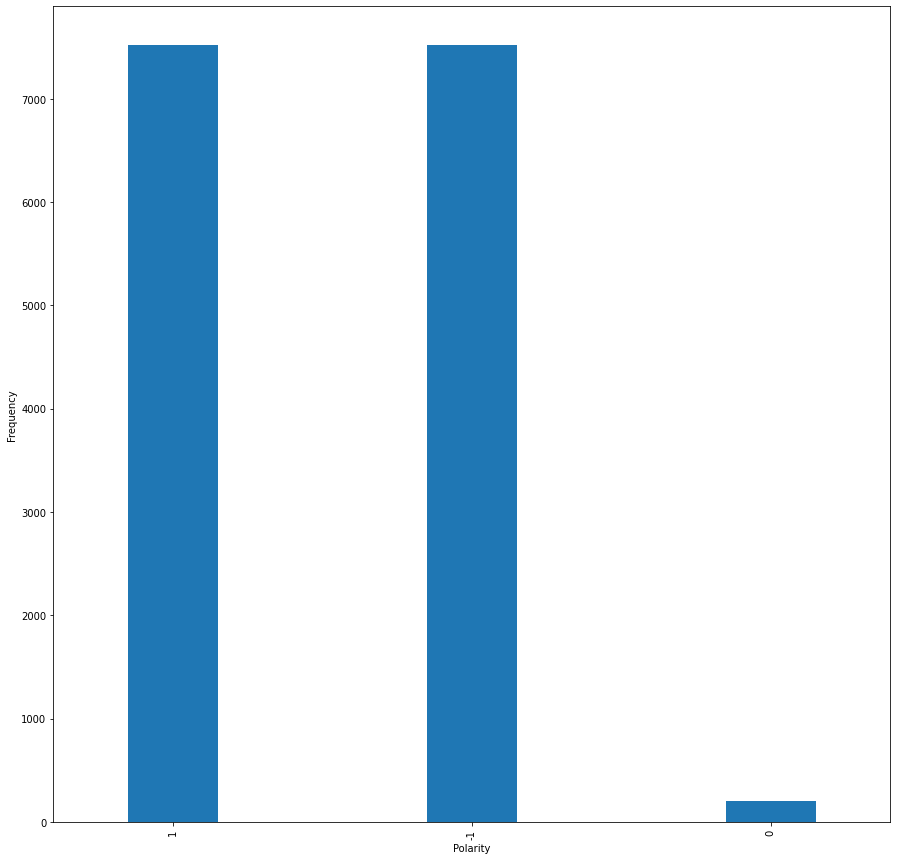

In [18]:
train_balanced_df['polarity'].value_counts(sort=False).plot.bar(figsize=(15,15), width = 0.3)
plt.xlabel('Polarity')
plt.ylabel('Frequency')

#### Visualization

In [19]:
def get_wordcloud(text, color='viridis'):
  # Create a WordCloud object
  
  wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', colormap=color)
  # Generate a word cloud
  return wordcloud.generate(text)

(-0.5, 399.5, 199.5, -0.5)

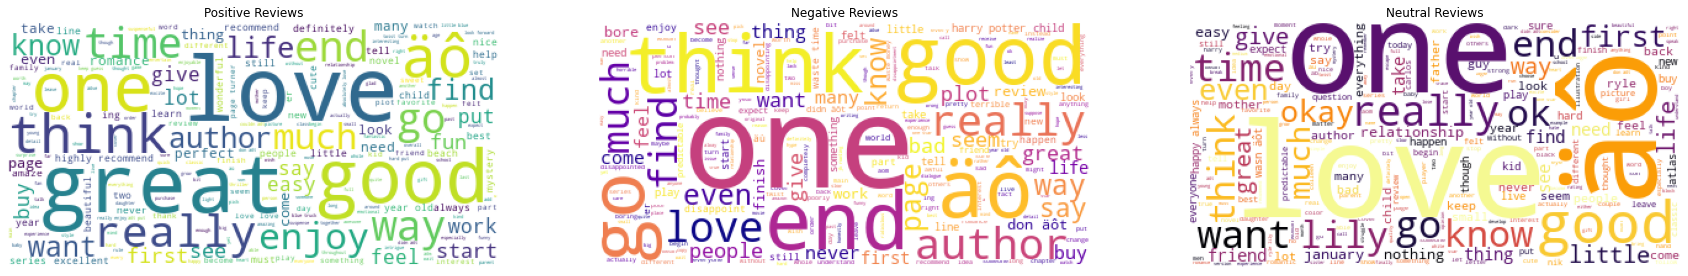

In [20]:
fig, axes =plt.subplots(1,3, figsize=(30,30))

# Wordcloud for positive reviews
pos_reviews = ' '.join(train_balanced_df['concat_review'][train_balanced_df['polarity']==1].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story', 'character']
for word in words:
  pos_reviews = pos_reviews.replace(word, '')

axes[0].set_title("Positive Reviews")
axes[0].imshow(get_wordcloud(pos_reviews))
axes[0].axis('off')

# Wordcloud for negative reviews
neg_reviews = ' '.join(train_balanced_df['concat_review'][train_balanced_df['polarity']==-1].values)

# Common words
words = ['well', 'make', 'book', 'use', 'read', 'write','story','character']
for word in words:
  neg_reviews = neg_reviews.replace(word, '')

axes[1].set_title("Negative Reviews")
axes[1].imshow(get_wordcloud(neg_reviews,'plasma'))
axes[1].axis('off')

# Wordcloud for neutral reviews
neutral_reviews = ' '.join(train_balanced_df['concat_review'][train_balanced_df['polarity']==0].values)
words = ['well', 'make', 'book', 'use', 'read', 'write','story','character']
for word in words:
  neutral_reviews = neutral_reviews.replace(word, '')

axes[2].set_title("Neutral Reviews")
axes[2].imshow(get_wordcloud(neutral_reviews, 'inferno'))
axes[2].axis('off')




## Modelling

In [21]:

X = train_balanced_df["concat_review"].values
Y = train_balanced_df['polarity'].values


unseen_X_test = test_df['concat_review'].values
unseen_Y_test = test_df['Annotator_1'].values

In [22]:
# Train and test split 
# 80 train 20 test split
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Y_lstm_train = pd.get_dummies(Y_train)
y_lstm_test = pd.get_dummies(y_test)

#### Different methods of vectorizing text

**Tf-Idf**

In [23]:
# Tf-Idf representation
tfidf_vect = TfidfVectorizer(min_df=5, max_features=10000, ngram_range=(1,2), lowercase=False, tokenizer=word_tokenize)

X_train_tfidf = tfidf_vect.fit_transform(X_train)
x_test_tfidf = tfidf_vect.transform(x_test)
unseen_X_test_tfidf = tfidf_vect.transform(unseen_X_test)

**Word2Vec - Averaged vector**




In [24]:
# Tokenization
X_train_tok = [word_tokenize(sentence) for sentence in X_train]
x_test_tok = [word_tokenize(sentence) for sentence in x_test]

unseen_X_test_tok = [word_tokenize(sentence) for sentence in unseen_X_test]

In [26]:
# Word2Vec model
model_word2vec = Word2Vec(min_count=2,
                     window=2,
                     vector_size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20)



In [27]:
# Building vocabulary
model_word2vec.build_vocab(X_train_tok)

In [28]:
# Training model
model_word2vec.train(X_train_tok, total_examples=model_word2vec.corpus_count, epochs=30, report_delay=1)
model_word2vec.save("model/word2vec.model")

In [29]:
model_word2vec = gensim.models.word2vec.Word2Vec.load("model/word2vec.model")

In [30]:
# Compute mean vector given the word2vec vector for every word in a document
def get_mean_vector(model, words):
    # remove out-of-vocabulary words
    words = [word for word in words if word in model.wv.key_to_index]
    if len(words) >= 1:
        return model.wv.get_mean_vector(words)
    else:
        return np.zeros(300)

In [31]:
# Get the mean vector
X_train_Word2Vec = [get_mean_vector(model_word2vec, review) for review in X_train_tok]
x_test_Word2Vec = [get_mean_vector(model_word2vec, review) for review in x_test_tok]

unseen_X_test_Word2Vec = [get_mean_vector(model_word2vec, review) for review in unseen_X_test_tok]


In [32]:
# Scaling values between 0 and 1


scaler_Word2Vec = MinMaxScaler(feature_range=(0,1))
X_train_Word2Vec = scaler_Word2Vec.fit_transform(X_train_Word2Vec)
x_test_Word2Vec = scaler_Word2Vec.transform(x_test_Word2Vec)

unseen_X_test_Word2Vec = scaler_Word2Vec.transform(unseen_X_test_Word2Vec)


## Doc2Vec

In [33]:
# Tag all the documents
tagged_data = [TaggedDocument(doc, tags=[str(i)]) for i, doc in enumerate(X_train_tok)]

In [34]:
# Building of the Doc2Vec model
model_doc2vec = gensim.models.doc2vec.Doc2Vec(vector_size=100, window=5, min_count=2, epochs=10)
model_doc2vec.build_vocab(tagged_data)
model_doc2vec.train(tagged_data, total_examples=model_doc2vec.corpus_count, epochs=model_doc2vec.epochs)


In [35]:
model_doc2vec.save("model/doc2vec.model")


In [36]:
model_doc2vec = gensim.models.doc2vec.Doc2Vec.load("model/doc2vec.model")

In [37]:
# Get the vectors for every document
X_train_Doc2Vec = model_doc2vec.dv.vectors
x_test_Doc2Vec = [model_doc2vec.infer_vector(doc) for doc in x_test_tok]
unseen_X_test_Doc2Vec = [model_doc2vec.infer_vector(doc) for doc in unseen_X_test_tok]


In [38]:
# Scaling values between 0 and 1
scaler_Doc2Vec = MinMaxScaler(feature_range=(0,1))
X_train_Doc2Vec = scaler_Doc2Vec.fit_transform(X_train_Doc2Vec)
x_test_Doc2Vec = scaler_Doc2Vec.transform(x_test_Doc2Vec)
unseen_X_test_Doc2Vec = scaler_Doc2Vec.transform(unseen_X_test_Doc2Vec)


In [39]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    
    cm = confusion_matrix(y_true, y_pred)
    conf_matrix=pd.DataFrame(data=cm,columns=['Predicted: -1','Predicted: 0','Predicted: 1'],
                                         index=['Actual: -1','Actual: 0','Actual: 1'])
                                                        
    plt.figure(figsize = (10,5))
    sn.set(font_scale=1.2)
    sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
    plt.title(f"Confusion Matrix for Sentiment Analysis using {model_name}")
    plt.yticks(rotation=360)
    plt.show()

    print(f"Confusion Matrix for Sentiment Analysis using {model_name}:",accuracy_score(y_true, y_pred))
    print("-"*100)
    print(f"Classification Report for Sentiment Analysis using {model_name}:\n\n",classification_report(y_true, y_pred))
    print("-"*100)
    Negative = cm[0][0]/(cm[0][0]+cm[0][1]+cm[0][2])*100
    print("Negative has a accuracy of {} %".format(Negative))
    print()
    Neutral = cm[1][1]/(cm[1][1]+cm[1][0]+cm[1][2])*100
    print("Neutral has a accuracy of {} %".format(Neutral))
    print()
    Positive = cm[2][2]/(cm[2][2]+cm[2][0]+cm[2][1])*100
    print("Positive has a accuracy of {} %".format(Positive))

## Traditional Machine Learning Models

Naive Bayes

In [40]:
def naive_bayes_model(x_train, y_train):
    # Naive bayes
    naive_bayes_mod = MultinomialNB()
    naive_bayes_mod.fit(x_train, y_train)
    

    return naive_bayes_mod


Linear SVC

In [41]:
# Support vector machine
def Linear_SVC_model(X_train, Y_train):
    Linear_SVC_mod = LinearSVC(max_iter=5000)
    Linear_SVC_mod.fit(X_train, Y_train)

    return Linear_SVC_mod


Logistic Regression

In [42]:
# Logistic regression
def LogisticRegression_model(X_train, Y_train):
    Logistic_Regression_mod = LogisticRegression(max_iter=3000)
    Logistic_Regression_mod.fit(X_train, Y_train)

    return Logistic_Regression_mod

## Tf-Idf

In [43]:
naive_bayes_tfidf = naive_bayes_model(X_train_tfidf, Y_train)
Linear_SVC_tfidf = Linear_SVC_model(X_train_tfidf, Y_train)
Logistic_Regression_tfidf = LogisticRegression_model(X_train_tfidf, Y_train)



nb_tfidf_file = "trained_models/Naive_Bayes_TFIDF_model.pkl"
linear_svc_tfidf_file = "trained_models/Linear_SVC_TFIDF_model.pkl"
lr_tfidf_file = "trained_models/Logistic_Regression_TFIDF_model.pkl"

joblib.dump(naive_bayes_tfidf, nb_tfidf_file)
joblib.dump(Linear_SVC_tfidf, linear_svc_tfidf_file)
joblib.dump(Logistic_Regression_tfidf, lr_tfidf_file)

['trained_models/Logistic_Regression_TFIDF_model.pkl']

In [44]:
naive_bayes_tfidf_prediction = naive_bayes_tfidf.predict(x_test_tfidf)
Linear_SVC_tfidf_prediction = Linear_SVC_tfidf.predict(x_test_tfidf)
Logistic_Regression_tfidf_prediction = Logistic_Regression_tfidf.predict(x_test_tfidf)

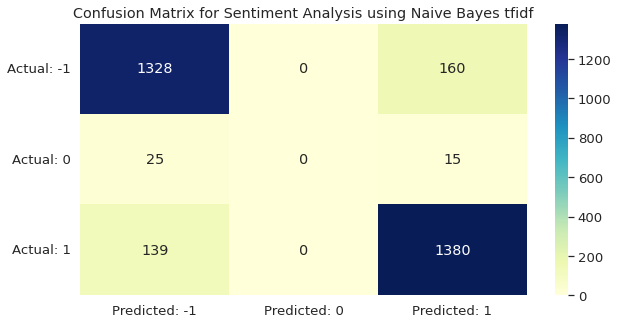

Confusion Matrix for Sentiment Analysis using Naive Bayes tfidf: 0.8887430259271415
----------------------------------------------------------------------------------------------------
Classification Report for Sentiment Analysis using Naive Bayes tfidf:

               precision    recall  f1-score   support

          -1       0.89      0.89      0.89      1488
           0       0.00      0.00      0.00        40
           1       0.89      0.91      0.90      1519

    accuracy                           0.89      3047
   macro avg       0.59      0.60      0.60      3047
weighted avg       0.88      0.89      0.88      3047

----------------------------------------------------------------------------------------------------
Negative has a accuracy of 89.24731182795699 %

Neutral has a accuracy of 0.0 %

Positive has a accuracy of 90.84924292297563 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


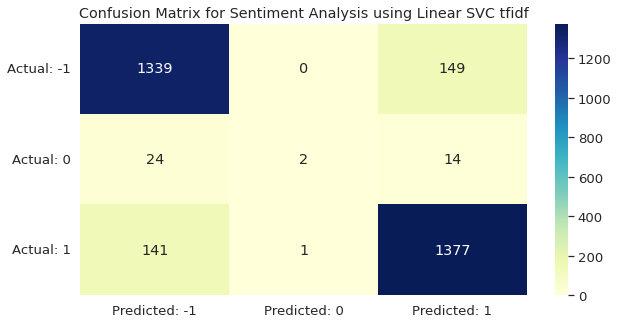

Confusion Matrix for Sentiment Analysis using Linear SVC tfidf: 0.8920249425664588
----------------------------------------------------------------------------------------------------
Classification Report for Sentiment Analysis using Linear SVC tfidf:

               precision    recall  f1-score   support

          -1       0.89      0.90      0.90      1488
           0       0.67      0.05      0.09        40
           1       0.89      0.91      0.90      1519

    accuracy                           0.89      3047
   macro avg       0.82      0.62      0.63      3047
weighted avg       0.89      0.89      0.89      3047

----------------------------------------------------------------------------------------------------
Negative has a accuracy of 89.98655913978494 %

Neutral has a accuracy of 5.0 %

Positive has a accuracy of 90.65174456879525 %


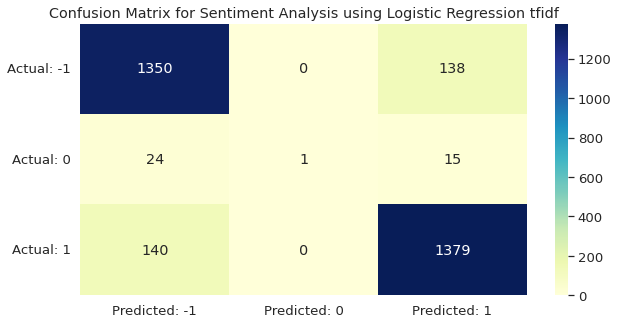

Confusion Matrix for Sentiment Analysis using Logistic Regression tfidf: 0.8959632425336397
----------------------------------------------------------------------------------------------------
Classification Report for Sentiment Analysis using Logistic Regression tfidf:

               precision    recall  f1-score   support

          -1       0.89      0.91      0.90      1488
           0       1.00      0.03      0.05        40
           1       0.90      0.91      0.90      1519

    accuracy                           0.90      3047
   macro avg       0.93      0.61      0.62      3047
weighted avg       0.90      0.90      0.89      3047

----------------------------------------------------------------------------------------------------
Negative has a accuracy of 90.7258064516129 %

Neutral has a accuracy of 2.5 %

Positive has a accuracy of 90.78341013824884 %


In [45]:
plot_confusion_matrix(y_test, naive_bayes_tfidf_prediction, "Naive Bayes tfidf")
plot_confusion_matrix(y_test,  Linear_SVC_tfidf_prediction, "Linear SVC tfidf")
plot_confusion_matrix(y_test,  Logistic_Regression_tfidf_prediction, "Logistic Regression tfidf")

In [46]:
length = unseen_X_test_tfidf.shape[0]
print(length)

start_time = time.time()
unseen_naive_bayes_tfidf_prediction = naive_bayes_tfidf.predict(unseen_X_test_tfidf)
time_taken = time.time()-start_time
classified_per_sec = length/time_taken
print("Predictions for Naive Bayes TF-IDF took ", time_taken, " seconds")
print("Number of reviews classified for Naive Bayes TF-IDF per second: ", classified_per_sec)
nb_tfidf_time_list = ["Naive Bayes TFIF", time_taken, classified_per_sec]

start_time=time.time()
unseen_Linear_SVC_tfidf_prediction = Linear_SVC_tfidf.predict(unseen_X_test_tfidf)
time_taken = time.time()-start_time
classified_per_sec = length/time_taken
print("Predictions for Linear_SVC TF-IDF took ", time_taken, " seconds")
print("Number of reviews classified for Linear_SVC TF-IDF per second: ", classified_per_sec)
svc_tfidf_time_list = ["Linear_SVC TF-IDF",time_taken, classified_per_sec]

start_time=time.time()
unseen_Logistic_Regression_tfidf_prediction = Logistic_Regression_tfidf.predict(unseen_X_test_tfidf)
time_taken = time.time()-start_time
classified_per_sec = length/time_taken
print("Predictions for Logistic Regression TF-IDF took ", time_taken, " seconds")
print("Number of reviews classified for Logistic Regression TF-IDF per second: ", classified_per_sec)
lr_tfidf_time_list = ["Logistic Regression TF-IDF",time_taken, classified_per_sec]


2330
Predictions for Naive Bayes TF-IDF took  0.0018780231475830078  seconds
Number of reviews classified for Naive Bayes TF-IDF per second:  1240666.2841183192
Predictions for Linear_SVC TF-IDF took  0.001863241195678711  seconds
Number of reviews classified for Linear_SVC TF-IDF per second:  1250509.0620601408
Predictions for Logistic Regression TF-IDF took  0.0013866424560546875  seconds
Number of reviews classified for Logistic Regression TF-IDF per second:  1680317.7991746906


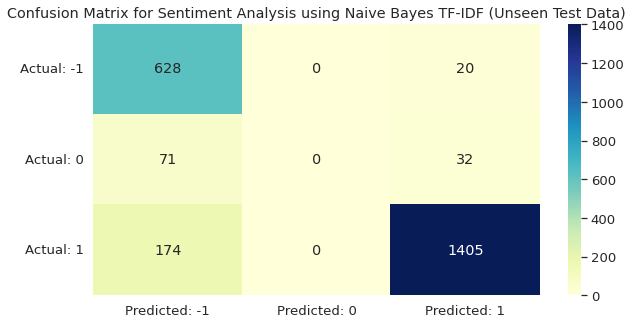

Confusion Matrix for Sentiment Analysis using Naive Bayes TF-IDF (Unseen Test Data): 0.8725321888412018
----------------------------------------------------------------------------------------------------
Classification Report for Sentiment Analysis using Naive Bayes TF-IDF (Unseen Test Data):

               precision    recall  f1-score   support

          -1       0.72      0.97      0.83       648
           0       0.00      0.00      0.00       103
           1       0.96      0.89      0.93      1579

    accuracy                           0.87      2330
   macro avg       0.56      0.62      0.58      2330
weighted avg       0.85      0.87      0.86      2330

----------------------------------------------------------------------------------------------------
Negative has a accuracy of 96.91358024691358 %

Neutral has a accuracy of 0.0 %

Positive has a accuracy of 88.98036732108929 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


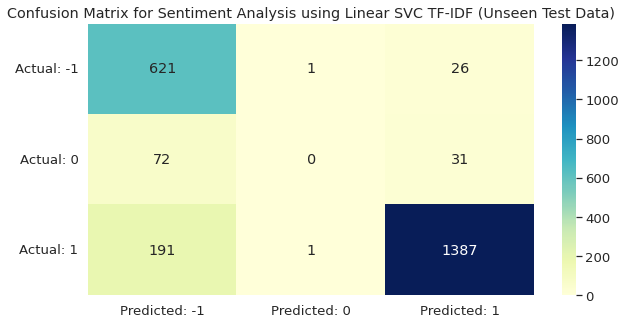

Confusion Matrix for Sentiment Analysis using Linear SVC TF-IDF (Unseen Test Data): 0.8618025751072962
----------------------------------------------------------------------------------------------------
Classification Report for Sentiment Analysis using Linear SVC TF-IDF (Unseen Test Data):

               precision    recall  f1-score   support

          -1       0.70      0.96      0.81       648
           0       0.00      0.00      0.00       103
           1       0.96      0.88      0.92      1579

    accuracy                           0.86      2330
   macro avg       0.55      0.61      0.58      2330
weighted avg       0.85      0.86      0.85      2330

----------------------------------------------------------------------------------------------------
Negative has a accuracy of 95.83333333333334 %

Neutral has a accuracy of 0.0 %

Positive has a accuracy of 87.84040531982266 %


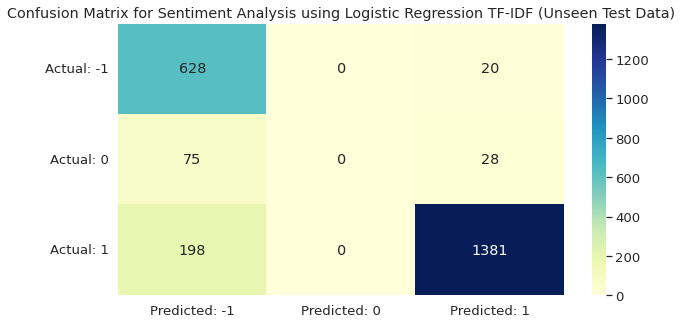

Confusion Matrix for Sentiment Analysis using Logistic Regression TF-IDF (Unseen Test Data): 0.8622317596566523
----------------------------------------------------------------------------------------------------
Classification Report for Sentiment Analysis using Logistic Regression TF-IDF (Unseen Test Data):

               precision    recall  f1-score   support

          -1       0.70      0.97      0.81       648
           0       0.00      0.00      0.00       103
           1       0.97      0.87      0.92      1579

    accuracy                           0.86      2330
   macro avg       0.55      0.61      0.58      2330
weighted avg       0.85      0.86      0.85      2330

----------------------------------------------------------------------------------------------------
Negative has a accuracy of 96.91358024691358 %

Neutral has a accuracy of 0.0 %

Positive has a accuracy of 87.46041798606713 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
plot_confusion_matrix(unseen_Y_test, unseen_naive_bayes_tfidf_prediction, "Naive Bayes TF-IDF (Unseen Test Data)")
plot_confusion_matrix(unseen_Y_test,  unseen_Linear_SVC_tfidf_prediction, "Linear SVC TF-IDF (Unseen Test Data)")
plot_confusion_matrix(unseen_Y_test,  unseen_Logistic_Regression_tfidf_prediction, "Logistic Regression TF-IDF (Unseen Test Data)")

In [48]:
from sklearn import metrics

print("MultinomialNB Accuracy for TF-IDF:",metrics.accuracy_score(y_test, naive_bayes_tfidf_prediction))
print("MultinomialNB Accuracy for unseen TF-IDF:",metrics.accuracy_score(unseen_Y_test,  unseen_naive_bayes_tfidf_prediction))
naive_bayes_tfidf_score = metrics.accuracy_score(y_test, naive_bayes_tfidf_prediction)
unseen_naive_bayes_tfidf_score = metrics.accuracy_score(unseen_Y_test, unseen_naive_bayes_tfidf_prediction)

print("Linear SVC Accuracy for TF-IDF:",metrics.accuracy_score(y_test, Linear_SVC_tfidf_prediction))
print("Linear SVC Accuracy for unseen TF-IDF:",metrics.accuracy_score(unseen_Y_test, unseen_Linear_SVC_tfidf_prediction))
Linear_SVC_tfidf_score = metrics.accuracy_score(y_test, Linear_SVC_tfidf_prediction)
unseen_Linear_SVC_tfidf_score = metrics.accuracy_score(unseen_Y_test, unseen_Linear_SVC_tfidf_prediction)

print("Logistic Regression Accuracy for TF-IDF:",metrics.accuracy_score(y_test, Logistic_Regression_tfidf_prediction))
print("Logistic Regression Accuracy for unseen test TF-IDF:",metrics.accuracy_score(unseen_Y_test, unseen_Logistic_Regression_tfidf_prediction))
Logistic_Regression_tfidf_score = metrics.accuracy_score(y_test, Logistic_Regression_tfidf_prediction)
unseen_Logistic_Regression_tfidf_score = metrics.accuracy_score(unseen_Y_test, unseen_Logistic_Regression_tfidf_prediction)

tfidf_score_list = [naive_bayes_tfidf_score, Linear_SVC_tfidf_score, Logistic_Regression_tfidf]
tfidf_unseen_score_lsit = [unseen_naive_bayes_tfidf_score, unseen_Linear_SVC_tfidf_score, unseen_Linear_SVC_tfidf_score]



MultinomialNB Accuracy for TF-IDF: 0.8887430259271415
MultinomialNB Accuracy for unseen TF-IDF: 0.8725321888412018
Linear SVC Accuracy for TF-IDF: 0.8920249425664588
Linear SVC Accuracy for unseen TF-IDF: 0.8618025751072962
Logistic Regression Accuracy for TF-IDF: 0.8959632425336397
Logistic Regression Accuracy for unseen test TF-IDF: 0.8622317596566523


## Word2Vec - Averaged vector

In [49]:
naive_bayes_Word2Vec = naive_bayes_model(X_train_Word2Vec, Y_train)
# Support vector machine
Linear_SVC_Word2Vec = Linear_SVC_model(X_train_Word2Vec, Y_train)
# Logistic regression
Logistic_Regression_Word2Vec = LogisticRegression_model(X_train_Word2Vec, Y_train)



nb_w2v_file = "trained_models/Naive_Bayes_W2V_model.pkl"
linear_svc_w2v_file = "trained_models/Linear_SVC_W2V_model.pkl"
lr_w2v_file = "trained_models/Logistic_Regression_W2V_model.pkl"

joblib.dump(naive_bayes_Word2Vec, nb_w2v_file)
joblib.dump(Linear_SVC_Word2Vec, linear_svc_w2v_file)
joblib.dump(Logistic_Regression_Word2Vec, lr_w2v_file)


['trained_models/Logistic_Regression_W2V_model.pkl']

In [50]:
naive_bayes_Word2Vec_prediction = naive_bayes_Word2Vec.predict(x_test_Word2Vec)
Linear_SVC_Word2Vec_prediction = Linear_SVC_Word2Vec.predict(x_test_Word2Vec)
Logistic_Regression_Word2Vec_prediction = Logistic_Regression_Word2Vec.predict(x_test_Word2Vec)

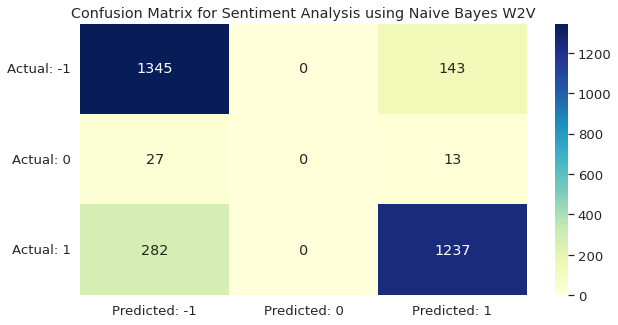

Confusion Matrix for Sentiment Analysis using Naive Bayes W2V: 0.8473908762717427
----------------------------------------------------------------------------------------------------
Classification Report for Sentiment Analysis using Naive Bayes W2V:

               precision    recall  f1-score   support

          -1       0.81      0.90      0.86      1488
           0       0.00      0.00      0.00        40
           1       0.89      0.81      0.85      1519

    accuracy                           0.85      3047
   macro avg       0.57      0.57      0.57      3047
weighted avg       0.84      0.85      0.84      3047

----------------------------------------------------------------------------------------------------
Negative has a accuracy of 90.38978494623656 %

Neutral has a accuracy of 0.0 %

Positive has a accuracy of 81.4351547070441 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


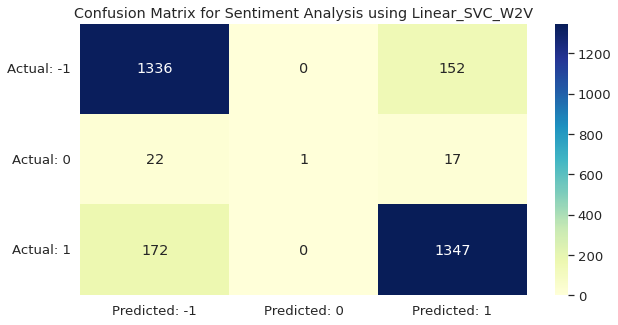

Confusion Matrix for Sentiment Analysis using Linear_SVC_W2V: 0.8808664259927798
----------------------------------------------------------------------------------------------------
Classification Report for Sentiment Analysis using Linear_SVC_W2V:

               precision    recall  f1-score   support

          -1       0.87      0.90      0.89      1488
           0       1.00      0.03      0.05        40
           1       0.89      0.89      0.89      1519

    accuracy                           0.88      3047
   macro avg       0.92      0.60      0.61      3047
weighted avg       0.88      0.88      0.88      3047

----------------------------------------------------------------------------------------------------
Negative has a accuracy of 89.78494623655914 %

Neutral has a accuracy of 2.5 %

Positive has a accuracy of 88.67676102699144 %


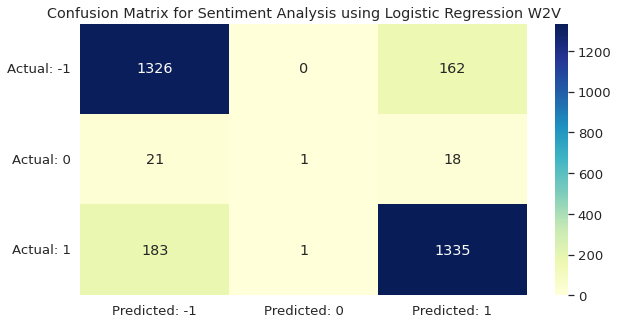

Confusion Matrix for Sentiment Analysis using Logistic Regression W2V: 0.8736462093862816
----------------------------------------------------------------------------------------------------
Classification Report for Sentiment Analysis using Logistic Regression W2V:

               precision    recall  f1-score   support

          -1       0.87      0.89      0.88      1488
           0       0.50      0.03      0.05        40
           1       0.88      0.88      0.88      1519

    accuracy                           0.87      3047
   macro avg       0.75      0.60      0.60      3047
weighted avg       0.87      0.87      0.87      3047

----------------------------------------------------------------------------------------------------
Negative has a accuracy of 89.11290322580645 %

Neutral has a accuracy of 2.5 %

Positive has a accuracy of 87.88676761026991 %


In [51]:
plot_confusion_matrix(y_test,  naive_bayes_Word2Vec_prediction, "Naive Bayes W2V")
plot_confusion_matrix(y_test,  Linear_SVC_Word2Vec_prediction, "Linear_SVC_W2V")
plot_confusion_matrix(y_test,  Logistic_Regression_Word2Vec_prediction, "Logistic Regression W2V")

In [52]:
length = unseen_X_test_Word2Vec.shape[0]

start_time = time.time()
unseen_naive_bayes_Word2Vec_prediction = naive_bayes_Word2Vec.predict(unseen_X_test_Word2Vec)
time_taken = time.time()-start_time
classified_per_sec = length/time_taken
print("Predictions for Naive Bayes W2V took ", time_taken, " seconds")
print("Number of reviews classified for Naive Bayes W2V per second: ", classified_per_sec)
nb_w2v_time_list = ["Naive Bayes W2V",time_taken, classified_per_sec]

start_time = time.time()
unseen_Linear_SVC_Word2Vec_prediction = Linear_SVC_Word2Vec.predict(unseen_X_test_Word2Vec)
time_taken = time.time()-start_time
classified_per_sec = length/time_taken
print("Predictions for Linear_SVC W2V took ", time_taken, " seconds")
print("Number of reviews classified for Linear_SVC_W2V per second: ", classified_per_sec)
svc_w2v_time_list = ["Linear_SVC W2V",time_taken, classified_per_sec]

start_time=time.time()
unseen_Logistic_Regression_Word2Vec_prediction = Logistic_Regression_Word2Vec.predict(unseen_X_test_Word2Vec)
time_taken = time.time()-start_time
classified_per_sec = length/time_taken
print("Predictions for Linear_SVC W2V took ", time_taken, " seconds")
print("Number of reviews classified for Logistic_Regression_W2V per second: ", classified_per_sec)
lr_w2v_time_list = ["Logistic Regression W2V",time_taken, classified_per_sec]

Predictions for Naive Bayes W2V took  0.004842519760131836  seconds
Number of reviews classified for Naive Bayes W2V per second:  481154.46408350155
Predictions for Linear_SVC W2V took  0.0023882389068603516  seconds
Number of reviews classified for Linear_SVC_W2V per second:  975614.2877108915
Predictions for Linear_SVC W2V took  0.0023534297943115234  seconds
Number of reviews classified for Logistic_Regression_W2V per second:  990044.4048222065


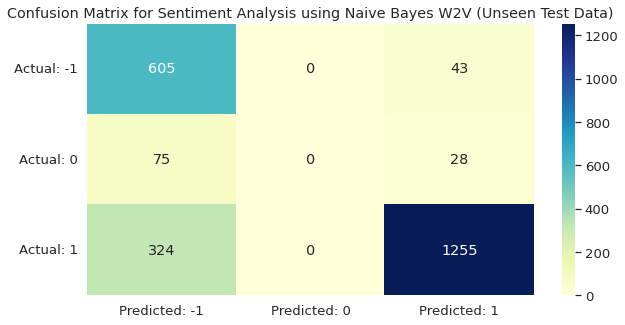

Confusion Matrix for Sentiment Analysis using Naive Bayes W2V (Unseen Test Data): 0.7982832618025751
----------------------------------------------------------------------------------------------------
Classification Report for Sentiment Analysis using Naive Bayes W2V (Unseen Test Data):

               precision    recall  f1-score   support

          -1       0.60      0.93      0.73       648
           0       0.00      0.00      0.00       103
           1       0.95      0.79      0.86      1579

    accuracy                           0.80      2330
   macro avg       0.52      0.58      0.53      2330
weighted avg       0.81      0.80      0.79      2330

----------------------------------------------------------------------------------------------------
Negative has a accuracy of 93.3641975308642 %

Neutral has a accuracy of 0.0 %

Positive has a accuracy of 79.48068397720075 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


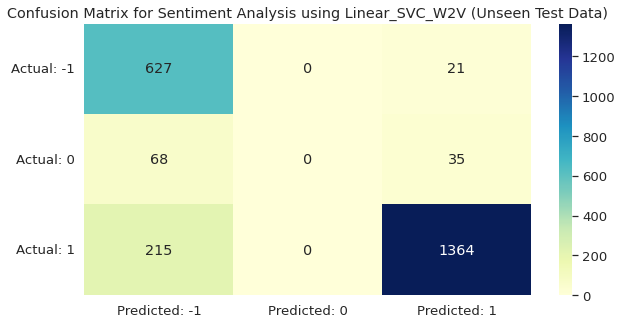

Confusion Matrix for Sentiment Analysis using Linear_SVC_W2V (Unseen Test Data): 0.8545064377682403
----------------------------------------------------------------------------------------------------
Classification Report for Sentiment Analysis using Linear_SVC_W2V (Unseen Test Data):

               precision    recall  f1-score   support

          -1       0.69      0.97      0.80       648
           0       0.00      0.00      0.00       103
           1       0.96      0.86      0.91      1579

    accuracy                           0.85      2330
   macro avg       0.55      0.61      0.57      2330
weighted avg       0.84      0.85      0.84      2330

----------------------------------------------------------------------------------------------------
Negative has a accuracy of 96.75925925925925 %

Neutral has a accuracy of 0.0 %

Positive has a accuracy of 86.38378720709309 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


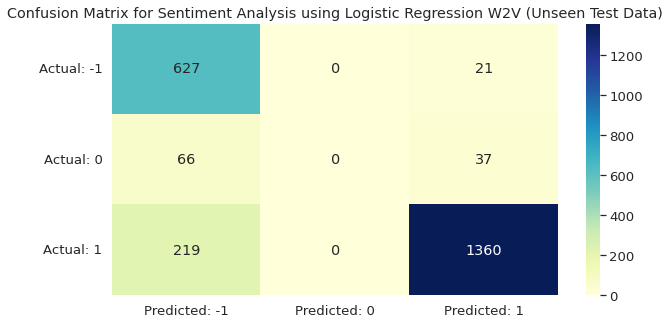

Confusion Matrix for Sentiment Analysis using Logistic Regression W2V (Unseen Test Data): 0.8527896995708154
----------------------------------------------------------------------------------------------------
Classification Report for Sentiment Analysis using Logistic Regression W2V (Unseen Test Data):

               precision    recall  f1-score   support

          -1       0.69      0.97      0.80       648
           0       0.00      0.00      0.00       103
           1       0.96      0.86      0.91      1579

    accuracy                           0.85      2330
   macro avg       0.55      0.61      0.57      2330
weighted avg       0.84      0.85      0.84      2330

----------------------------------------------------------------------------------------------------
Negative has a accuracy of 96.75925925925925 %

Neutral has a accuracy of 0.0 %

Positive has a accuracy of 86.13046231792273 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
plot_confusion_matrix(unseen_Y_test,  unseen_naive_bayes_Word2Vec_prediction, "Naive Bayes W2V (Unseen Test Data)")
plot_confusion_matrix(unseen_Y_test,  unseen_Linear_SVC_Word2Vec_prediction, "Linear_SVC_W2V (Unseen Test Data)")
plot_confusion_matrix(unseen_Y_test,  unseen_Logistic_Regression_Word2Vec_prediction, "Logistic Regression W2V (Unseen Test Data)")

In [54]:
print("MultinomialNB Accuracy for Word2Vec:",metrics.accuracy_score(y_test, naive_bayes_Word2Vec_prediction))
print("MultinomialNB Accuracy for unseen test Word2Vec:",metrics.accuracy_score(unseen_Y_test, unseen_naive_bayes_Word2Vec_prediction))
naive_bayes_Word2Vec_score = metrics.accuracy_score(y_test, naive_bayes_Word2Vec_prediction)
unseen_naive_bayes_Word2Vec_score = metrics.accuracy_score(unseen_Y_test, unseen_naive_bayes_Word2Vec_prediction)

print("Linear SVC Accuracy for Linear_SVC_Word2Vec:",metrics.accuracy_score(y_test, Linear_SVC_Word2Vec_prediction))
print("Linear SVC Accuracy for unseen test Word2Vec:",metrics.accuracy_score(unseen_Y_test, unseen_Linear_SVC_Word2Vec_prediction))
Linear_SVC_Word2Vec_score = metrics.accuracy_score(y_test, Linear_SVC_Word2Vec_prediction)
unseen_Linear_SVC_Word2Vec_score = metrics.accuracy_score(unseen_Y_test, unseen_Linear_SVC_Word2Vec_prediction)

print("Logistic Regression Accuracy for Logistic_Regression_Word2Vec:",metrics.accuracy_score(y_test, Logistic_Regression_Word2Vec_prediction))
print("Logistic Regression Accuracy for unseen test Word2Vec:",metrics.accuracy_score(unseen_Y_test, unseen_Logistic_Regression_Word2Vec_prediction))
Logistic_Regression_Word2Vec_score = metrics.accuracy_score(y_test, Logistic_Regression_Word2Vec_prediction)
unseen_Logistic_Regression_Word2Vec_score = metrics.accuracy_score(unseen_Y_test, unseen_Logistic_Regression_Word2Vec_prediction)

W2V_score_list = [naive_bayes_Word2Vec_score, Linear_SVC_Word2Vec_score, Logistic_Regression_Word2Vec_score]
unseen_W2V_score_list = [unseen_naive_bayes_Word2Vec_score, unseen_Linear_SVC_Word2Vec_score, unseen_Logistic_Regression_Word2Vec_score]

MultinomialNB Accuracy for Word2Vec: 0.8473908762717427
MultinomialNB Accuracy for unseen test Word2Vec: 0.7982832618025751
Linear SVC Accuracy for Linear_SVC_Word2Vec: 0.8808664259927798
Linear SVC Accuracy for unseen test Word2Vec: 0.8545064377682403
Logistic Regression Accuracy for Logistic_Regression_Word2Vec: 0.8736462093862816
Logistic Regression Accuracy for unseen test Word2Vec: 0.8527896995708154


## Doc2Vec

In [55]:
naive_bayes_Doc2Vec = naive_bayes_model(X_train_Doc2Vec, Y_train)
# Support vector machine
Linear_SVC_Doc2Vec = Linear_SVC_model(X_train_Doc2Vec, Y_train)
Logistic_Regression_Doc2Vec= LogisticRegression_model(X_train_Doc2Vec, Y_train)

nb_d2v_file = "trained_models/Naive_Bayes_D2V_model.pkl"
linear_svc_d2v_file = "trained_models/Linear_SVC_D2V_model.pkl"
lr_d2v_file = "trained_models/Logistic_Regression_D2V_model.pkl"

joblib.dump(naive_bayes_Doc2Vec, nb_d2v_file)
joblib.dump(Linear_SVC_Doc2Vec, linear_svc_d2v_file)
joblib.dump(Logistic_Regression_Doc2Vec, lr_d2v_file)

['trained_models/Logistic_Regression_D2V_model.pkl']

In [56]:
naive_bayes_Doc2Vec_prediction = naive_bayes_Doc2Vec.predict(x_test_Doc2Vec)
Linear_SVC_Doc2Vec_prediction = Linear_SVC_Doc2Vec.predict(x_test_Doc2Vec)
Logistic_Regression_Doc2Vec_prediction = Logistic_Regression_Doc2Vec.predict(x_test_Doc2Vec)

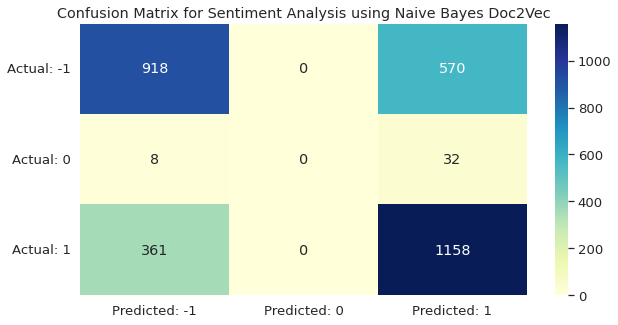

Confusion Matrix for Sentiment Analysis using Naive Bayes Doc2Vec: 0.6813258943222842
----------------------------------------------------------------------------------------------------
Classification Report for Sentiment Analysis using Naive Bayes Doc2Vec:

               precision    recall  f1-score   support

          -1       0.71      0.62      0.66      1488
           0       0.00      0.00      0.00        40
           1       0.66      0.76      0.71      1519

    accuracy                           0.68      3047
   macro avg       0.46      0.46      0.46      3047
weighted avg       0.68      0.68      0.68      3047

----------------------------------------------------------------------------------------------------
Negative has a accuracy of 61.693548387096776 %

Neutral has a accuracy of 0.0 %

Positive has a accuracy of 76.23436471362739 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


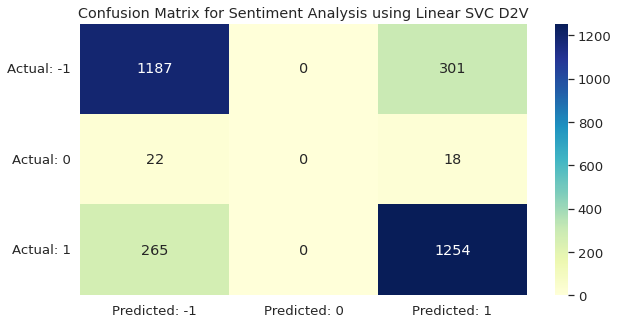

Confusion Matrix for Sentiment Analysis using Linear SVC D2V: 0.8011158516573679
----------------------------------------------------------------------------------------------------
Classification Report for Sentiment Analysis using Linear SVC D2V:

               precision    recall  f1-score   support

          -1       0.81      0.80      0.80      1488
           0       0.00      0.00      0.00        40
           1       0.80      0.83      0.81      1519

    accuracy                           0.80      3047
   macro avg       0.53      0.54      0.54      3047
weighted avg       0.79      0.80      0.80      3047

----------------------------------------------------------------------------------------------------
Negative has a accuracy of 79.77150537634408 %

Neutral has a accuracy of 0.0 %

Positive has a accuracy of 82.5543120473996 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


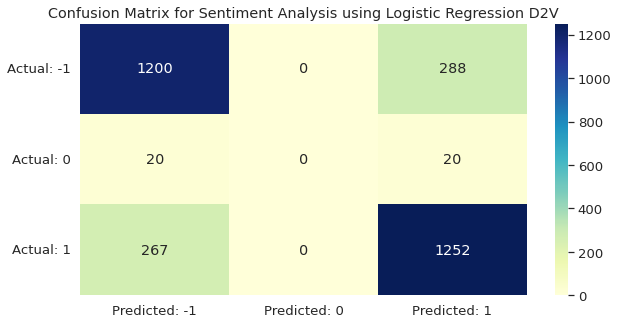

Confusion Matrix for Sentiment Analysis using Logistic Regression D2V: 0.804725959960617
----------------------------------------------------------------------------------------------------
Classification Report for Sentiment Analysis using Logistic Regression D2V:

               precision    recall  f1-score   support

          -1       0.81      0.81      0.81      1488
           0       0.00      0.00      0.00        40
           1       0.80      0.82      0.81      1519

    accuracy                           0.80      3047
   macro avg       0.54      0.54      0.54      3047
weighted avg       0.79      0.80      0.80      3047

----------------------------------------------------------------------------------------------------
Negative has a accuracy of 80.64516129032258 %

Neutral has a accuracy of 0.0 %

Positive has a accuracy of 82.42264647794602 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
plot_confusion_matrix(y_test,  naive_bayes_Doc2Vec_prediction, "Naive Bayes Doc2Vec")
plot_confusion_matrix(y_test, Linear_SVC_Doc2Vec_prediction, "Linear SVC D2V")
plot_confusion_matrix(y_test,  Logistic_Regression_Doc2Vec_prediction, "Logistic Regression D2V")


In [58]:
length = unseen_X_test_Doc2Vec.shape[0]

start_time = time.time()
unseen_naive_bayes_Doc2Vec_prediction = naive_bayes_Doc2Vec.predict(unseen_X_test_Doc2Vec)
time_taken = time.time()-start_time
classified_per_sec = length/time_taken
print("Predictions for Naive Bayes D2V took ", time_taken, " seconds")
print("Number of reviews classified for Naive Bayes D2V per second: ", classified_per_sec)
nb_d2v_time_list = ["Naive Bayes D2V",time_taken, classified_per_sec]

start_time= time.time()
unseen_Linear_SVC_Doc2Vec_prediction = Linear_SVC_Doc2Vec.predict(unseen_X_test_Doc2Vec)
time_taken = time.time()-start_time
classified_per_sec = length/time_taken
print("Predictions for Linear SVC D2V took ", time_taken, " seconds")
print("Number of reviews classified for Linear SVC D2V per second: ", classified_per_sec)
svc_d2v_time_list = ["Linear SVC D2V",time_taken, classified_per_sec]

start_time = time.time()
unseen_Logistic_Regression_Doc2Vec_prediction = Logistic_Regression_Doc2Vec.predict(unseen_X_test_Doc2Vec)
time_taken = time.time()-start_time
classified_per_sec = length/time_taken
print("Predictions for Linear SVC D2V took ", time_taken, " seconds")
print("Number of reviews classified for Linear SVC D2V per second: ", classified_per_sec)
lr_d2v_time_list = ["Logistic Regression D2V",time_taken, classified_per_sec]

Predictions for Naive Bayes D2V took  0.007433652877807617  seconds
Number of reviews classified for Naive Bayes D2V per second:  313439.4406491549
Predictions for Linear SVC D2V took  0.0013942718505859375  seconds
Number of reviews classified for Linear SVC D2V per second:  1671123.1737346102
Predictions for Linear SVC D2V took  0.0011484622955322266  seconds
Number of reviews classified for Linear SVC D2V per second:  2028799.7342744446


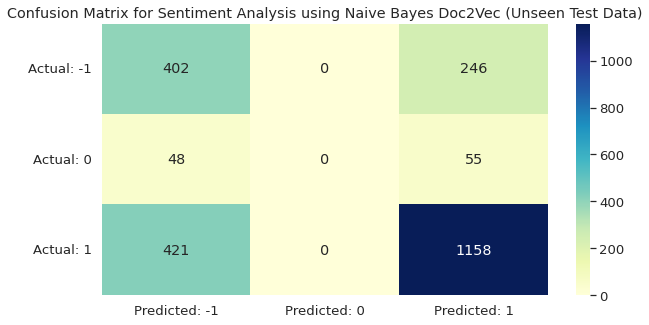

Confusion Matrix for Sentiment Analysis using Naive Bayes Doc2Vec (Unseen Test Data): 0.6695278969957081
----------------------------------------------------------------------------------------------------
Classification Report for Sentiment Analysis using Naive Bayes Doc2Vec (Unseen Test Data):

               precision    recall  f1-score   support

          -1       0.46      0.62      0.53       648
           0       0.00      0.00      0.00       103
           1       0.79      0.73      0.76      1579

    accuracy                           0.67      2330
   macro avg       0.42      0.45      0.43      2330
weighted avg       0.67      0.67      0.66      2330

----------------------------------------------------------------------------------------------------
Negative has a accuracy of 62.03703703703704 %

Neutral has a accuracy of 0.0 %

Positive has a accuracy of 73.3375554148195 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


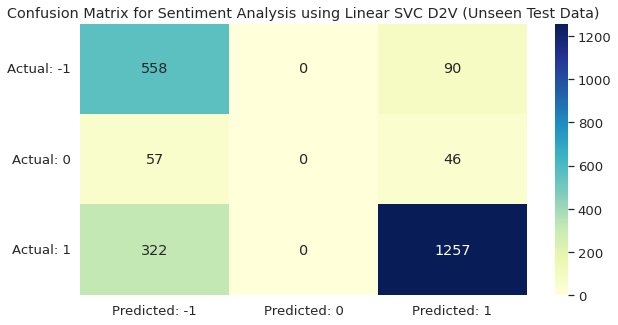

Confusion Matrix for Sentiment Analysis using Linear SVC D2V (Unseen Test Data): 0.778969957081545
----------------------------------------------------------------------------------------------------
Classification Report for Sentiment Analysis using Linear SVC D2V (Unseen Test Data):

               precision    recall  f1-score   support

          -1       0.60      0.86      0.70       648
           0       0.00      0.00      0.00       103
           1       0.90      0.80      0.85      1579

    accuracy                           0.78      2330
   macro avg       0.50      0.55      0.52      2330
weighted avg       0.78      0.78      0.77      2330

----------------------------------------------------------------------------------------------------
Negative has a accuracy of 86.11111111111111 %

Neutral has a accuracy of 0.0 %

Positive has a accuracy of 79.60734642178593 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


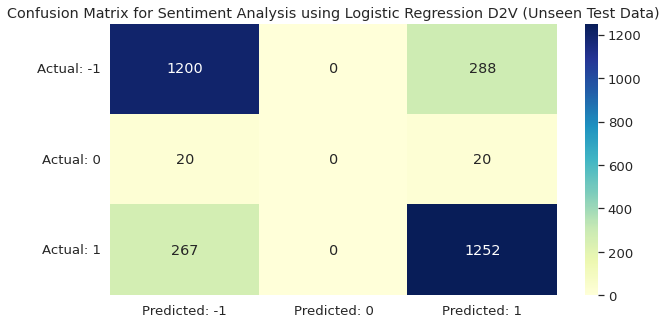

Confusion Matrix for Sentiment Analysis using Logistic Regression D2V (Unseen Test Data): 0.804725959960617
----------------------------------------------------------------------------------------------------
Classification Report for Sentiment Analysis using Logistic Regression D2V (Unseen Test Data):

               precision    recall  f1-score   support

          -1       0.81      0.81      0.81      1488
           0       0.00      0.00      0.00        40
           1       0.80      0.82      0.81      1519

    accuracy                           0.80      3047
   macro avg       0.54      0.54      0.54      3047
weighted avg       0.79      0.80      0.80      3047

----------------------------------------------------------------------------------------------------
Negative has a accuracy of 80.64516129032258 %

Neutral has a accuracy of 0.0 %

Positive has a accuracy of 82.42264647794602 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
plot_confusion_matrix(unseen_Y_test,  unseen_naive_bayes_Doc2Vec_prediction, "Naive Bayes Doc2Vec (Unseen Test Data)")
plot_confusion_matrix(unseen_Y_test, unseen_Linear_SVC_Doc2Vec_prediction, "Linear SVC D2V (Unseen Test Data)")
plot_confusion_matrix(y_test,  Logistic_Regression_Doc2Vec_prediction, "Logistic Regression D2V (Unseen Test Data)")

In [60]:
print("MultinomialNB Accuracy for Doc2Vec:",metrics.accuracy_score(y_test, naive_bayes_Doc2Vec_prediction))
print("MultinomialNB Accuracy for unseen test Doc2Vec:",metrics.accuracy_score(unseen_Y_test, unseen_naive_bayes_Doc2Vec_prediction))
naive_bayes_Doc2Vec_score = metrics.accuracy_score(y_test, naive_bayes_Doc2Vec_prediction)
unseen_naive_bayes_Doc2Vec_score = metrics.accuracy_score(unseen_Y_test, unseen_naive_bayes_Doc2Vec_prediction)

print("Linear_SVC Accuracy for Doc2Vec:",metrics.accuracy_score(y_test, Linear_SVC_Doc2Vec_prediction))
print("Linear_SVC Accuracy for unseen test Doc2Vec:",metrics.accuracy_score(unseen_Y_test, unseen_Linear_SVC_Doc2Vec_prediction))
Linear_SVC_Doc2Vec_score = metrics.accuracy_score(y_test, Linear_SVC_Doc2Vec_prediction)
unseen_Linear_SVC_Doc2Vec_score = metrics.accuracy_score(unseen_Y_test, unseen_Linear_SVC_Doc2Vec_prediction)

print("Logistic Regression Accuracy for Doc2Vec:",metrics.accuracy_score(y_test, Logistic_Regression_Doc2Vec_prediction))
print("Logistic Regression Accuracy for unseen Doc2Vec:",metrics.accuracy_score(unseen_Y_test, unseen_Logistic_Regression_Doc2Vec_prediction))
Logistic_Regression_Doc2Vec_score = metrics.accuracy_score(y_test, Logistic_Regression_Doc2Vec_prediction)
unseen_Logistic_Regression_Doc2Vec_score = metrics.accuracy_score(unseen_Y_test, unseen_Logistic_Regression_Doc2Vec_prediction)

D2V_score_list = [naive_bayes_Doc2Vec_score, Linear_SVC_Doc2Vec_score, Logistic_Regression_Doc2Vec_score]
unseen_D2V_score_list = [unseen_naive_bayes_Doc2Vec_score, unseen_Linear_SVC_Doc2Vec_score, unseen_Logistic_Regression_Doc2Vec_score]

MultinomialNB Accuracy for Doc2Vec: 0.6813258943222842
MultinomialNB Accuracy for unseen test Doc2Vec: 0.6695278969957081
Linear_SVC Accuracy for Doc2Vec: 0.8011158516573679
Linear_SVC Accuracy for unseen test Doc2Vec: 0.778969957081545
Logistic Regression Accuracy for Doc2Vec: 0.804725959960617
Logistic Regression Accuracy for unseen Doc2Vec: 0.7892703862660945


## LSTM Neural Network

In [61]:
def model_architecture(emb_layer):
  
    # Creating a LSTM Model 
    # Dropout is use to prevent the model from overfitting
    LSTM_model = Sequential()
    LSTM_model.add(emb_layer)
    LSTM_model.add(Dropout(0.5))
    LSTM_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    LSTM_model.add(Dense(3, activation='softmax'))
    LSTM_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

    return LSTM_model
    
def get_true_pred(predictions, y_test):
    neg_count, neu_count, pos_count = 0, 0, 0
    real_neg, real_neu, real_pos = 0, 0, 0

    y_pred = []
    y_true = []

    for i, prediction in enumerate(predictions):
        print(i)
        print(prediction)
        if np.argmax(prediction) == 0:
            neg_count += 1
        elif np.argmax(prediction) == 1:
            neu_count += 1
        else:
            pos_count += 1

        y_pred.append(np.argmax(prediction))

        if np.argmax(y_test[i]) == 0:
            real_neg += 1
        elif np.argmax(y_test[i]) == 1:    
            real_neu += 1
        else:
            real_pos +=1

        y_true.append(np.argmax(y_test[i]))

    print('Negative predictions:', neg_count)
    print('Neutral predictions:', neu_count)
    print('Positive predictions:', pos_count)
    print('True negative:', real_neg)
    print('True neutral:', real_neu)
    print('True positive:', real_pos)
    
    return y_true, y_pred

from keras.callbacks import ReduceLROnPlateau
early_stopping = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

## Word2Vec

In [62]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_w2v_seq = tokenizer.texts_to_sequences(X_train)
words_to_index = tokenizer.word_index
vocab_size = len(words_to_index)+1

#We define maxLen which is the maximum length of one review we will use for our training, 
# Try 1000 
maxLen = 1000

#  we will pad the sequences so all of them have the same length.
X_train_seq = pad_sequences(X_train_w2v_seq, maxlen=maxLen)
x_test_indices = tokenizer.texts_to_sequences(x_test)
x_test_indices = pad_sequences(x_test_indices, maxlen=maxLen)

In [63]:
# Create embedding matrix
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    if word in model_word2vec.wv:
        embedding_matrix[i] = model_word2vec.wv[word]
print(embedding_matrix.shape)

(23149, 300)


In [64]:
w2v_embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=1000)

In [65]:
w2v_lstm_model = model_architecture(w2v_embedding_layer)
w2v_lstm_model.fit(X_train_seq, Y_lstm_train,
                batch_size=32,
                epochs=10,
                validation_data=(x_test_indices, y_lstm_test),
                verbose=1,
                callbacks=early_stopping)


Epoch 1/10
381/381 [==============================] - 1427s 4s/step - loss: 0.3675 - accuracy: 0.8640 - val_loss: 0.3433 - val_accuracy: 0.8628 - lr: 0.0010
Epoch 2/10
381/381 [==============================] - 1424s 4s/step - loss: 0.2822 - accuracy: 0.8979 - val_loss: 0.2930 - val_accuracy: 0.8924 - lr: 0.0010
Epoch 3/10
381/381 [==============================] - 1495s 4s/step - loss: 0.2305 - accuracy: 0.9179 - val_loss: 0.2891 - val_accuracy: 0.8999 - lr: 0.0010
Epoch 4/10
381/381 [==============================] - 1525s 4s/step - loss: 0.1837 - accuracy: 0.9371 - val_loss: 0.2884 - val_accuracy: 0.8924 - lr: 0.0010
Epoch 5/10
381/381 [==============================] - 1503s 4s/step - loss: 0.1380 - accuracy: 0.9520 - val_loss: 0.3215 - val_accuracy: 0.8914 - lr: 0.0010
Epoch 6/10
381/381 [==============================] - 1465s 4s/step - loss: 0.1073 - accuracy: 0.9646 - val_loss: 0.3490 - val_accuracy: 0.8884 - lr: 0.0010
Epoch 7/10
381/381 [==============================] - 1460

In [66]:
w2v_lstm_model.save('trained_models/w2v_lstm_model')

In [67]:
unseen_lstm_Y_test = pd.get_dummies(unseen_Y_test)
sequences_test = tokenizer.texts_to_sequences(unseen_X_test)
unseen_X_test = pad_sequences(sequences_test, maxlen=1000)

length = unseen_X_test.shape[0]

start_time=time.time()
pred = w2v_lstm_model.predict(unseen_X_test)
time_taken = time.time()-start_time
classified_per_sec = length/time_taken
print("Predictions for LSTM W2V took ", time_taken, " seconds")
print("Number of reviews classified for LSTM W2V per second: ", classified_per_sec)
lstm_w2v_time_list = ["LSTM W2V",time_taken, classified_per_sec]


73/73 [==============================] - 36s 487ms/step
Predictions for LSTM W2V took  35.985267162323  seconds
Number of reviews classified for LSTM W2V per second:  64.74872034407285


0
[9.9994594e-01 3.6902398e-05 1.7016133e-05]
1
[0.98838973 0.01011454 0.00149564]
2
[9.9991065e-01 8.6824373e-05 2.4932062e-06]
3
[0.07377439 0.06529174 0.8609338 ]
4
[0.8896207  0.10753307 0.00284627]
5
[9.9999124e-01 5.0142762e-06 3.7311579e-06]
6
[9.9818641e-01 1.5141779e-03 2.9944035e-04]
7
[9.9876714e-01 1.1964118e-03 3.6437086e-05]
8
[9.9853569e-01 1.4108217e-03 5.3417592e-05]
9
[9.9886310e-01 8.0428895e-04 3.3251802e-04]
10
[9.9927974e-01 1.2952893e-04 5.9072173e-04]
11
[9.99783516e-01 1.07651234e-04 1.08815439e-04]
12
[9.9821985e-01 1.5949650e-03 1.8523405e-04]
13
[9.9981332e-01 1.6408238e-04 2.2615366e-05]
14
[9.9986315e-01 1.1258360e-04 2.4212522e-05]
15
[9.9995500e-01 4.1251446e-05 3.6725341e-06]
16
[0.9738269  0.00448788 0.02168517]
17
[9.9719971e-01 2.6194055e-03 1.8085475e-04]
18
[9.9999434e-01 3.3372201e-06 2.2258362e-06]
19
[9.9985504e-01 9.7818760e-05 4.7214085e-05]
20
[0.14140119 0.03450843 0.8240903 ]
21
[9.9998814e-01 6.6900275e-06 5.1104380e-06]
22
[9.9984670e-01 

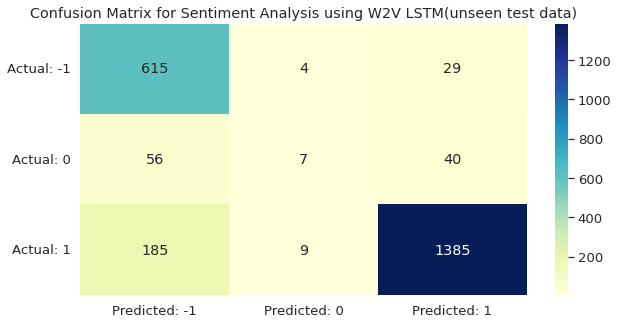

Confusion Matrix for Sentiment Analysis using W2V LSTM(unseen test data): 0.8613733905579399
----------------------------------------------------------------------------------------------------
Classification Report for Sentiment Analysis using W2V LSTM(unseen test data):

               precision    recall  f1-score   support

           0       0.72      0.95      0.82       648
           1       0.35      0.07      0.11       103
           2       0.95      0.88      0.91      1579

    accuracy                           0.86      2330
   macro avg       0.67      0.63      0.61      2330
weighted avg       0.86      0.86      0.85      2330

----------------------------------------------------------------------------------------------------
Negative has a accuracy of 94.9074074074074 %

Neutral has a accuracy of 6.796116504854369 %

Positive has a accuracy of 87.71374287523749 %


In [68]:
y_true, y_pred = get_true_pred(pred, unseen_lstm_Y_test.values)
plot_confusion_matrix(y_true, y_pred, "W2V LSTM(unseen test data)")

# Glove Embeddings

In [69]:

def read_glove_vector(glove_vec):
  with open(glove_vec, 'r', encoding='UTF-8') as f:
    word_to_vec_map = {}
    for line in f:
      w_line = line.split(' ')
      curr_word = w_line[0]
      word_to_vec_map[curr_word] = np.array(w_line[1:], dtype='float32')

    return word_to_vec_map

In [71]:
word_to_vec_map = read_glove_vector('glove.6B/glove.6B.50d.txt')

In [72]:
emb_matrix = np.zeros((vocab_size, 50))

print(emb_matrix.shape)
for word, index in words_to_index.items():
  embedding_vector = word_to_vec_map.get(word)
  if embedding_vector is not None:
    emb_matrix[index] = embedding_vector

glove_embedding_layer = Embedding(input_dim=vocab_size, output_dim=50, weights = [emb_matrix], trainable=False)


(23149, 50)


In [73]:
glove_lstm_model = model_architecture(glove_embedding_layer)
glove_lstm_model.fit(X_train_seq, Y_lstm_train,
                batch_size=32,
                epochs=10,
                validation_data=(x_test_indices, y_lstm_test),
                verbose=1,
                callbacks=early_stopping)


Epoch 1/10
381/381 [==============================] - 734s 2s/step - loss: 0.5994 - accuracy: 0.7238 - val_loss: 0.4865 - val_accuracy: 0.7988 - lr: 0.0010
Epoch 2/10
381/381 [==============================] - 728s 2s/step - loss: 0.5090 - accuracy: 0.7814 - val_loss: 0.4413 - val_accuracy: 0.8185 - lr: 0.0010
Epoch 3/10
381/381 [==============================] - 726s 2s/step - loss: 0.4790 - accuracy: 0.7979 - val_loss: 0.4231 - val_accuracy: 0.8254 - lr: 0.0010
Epoch 4/10
381/381 [==============================] - 725s 2s/step - loss: 0.4722 - accuracy: 0.8009 - val_loss: 0.4127 - val_accuracy: 0.8267 - lr: 0.0010
Epoch 5/10
381/381 [==============================] - 726s 2s/step - loss: 0.4505 - accuracy: 0.8081 - val_loss: 0.4290 - val_accuracy: 0.8211 - lr: 0.0010
Epoch 6/10
381/381 [==============================] - 728s 2s/step - loss: 0.4362 - accuracy: 0.8188 - val_loss: 0.3854 - val_accuracy: 0.8415 - lr: 0.0010
Epoch 7/10
381/381 [==============================] - 729s 2s/st

In [74]:
glove_lstm_model.save('trained_models/glove_lstm_model')

In [75]:
length = unseen_X_test.shape[0]

start_time= time.time()
pred = glove_lstm_model.predict(unseen_X_test)
time_taken = time.time()-start_time
classified_per_sec = length/time_taken
print("Predictions for LSTM GloVe took ", time_taken, " seconds")
print("Number of reviews classified for LSTM GLoVE per second: ", classified_per_sec)
lstm_glove_time_list = ["LSTM GloVe",time_taken, classified_per_sec]


73/73 [==============================] - 20s 273ms/step
Predictions for LSTM GloVe took  20.329634189605713  seconds
Number of reviews classified for LSTM GLoVE per second:  114.61101455486592


0
[0.8698182  0.00756638 0.12261535]
1
[0.6768631  0.03630501 0.28683192]
2
[0.9513972  0.00739589 0.04120686]
3
[0.8841729  0.01986497 0.09596217]
4
[0.755774   0.03458181 0.2096441 ]
5
[9.9780142e-01 3.8285420e-04 1.8157603e-03]
6
[0.96017694 0.00542312 0.03439993]
7
[9.9636024e-01 7.7265233e-04 2.8671443e-03]
8
[0.9340369 0.0136912 0.0522719]
9
[0.3974356  0.01322019 0.58934426]
10
[0.7979709  0.02031113 0.18171802]
11
[0.9621362  0.00463651 0.03322727]
12
[0.95901537 0.00224308 0.03874158]
13
[0.9549289  0.00420604 0.0408651 ]
14
[0.95572007 0.01507153 0.02920831]
15
[0.9910428  0.00124707 0.00771013]
16
[0.77120835 0.03752584 0.19126588]
17
[0.90282935 0.00777492 0.08939575]
18
[9.9667895e-01 3.5088550e-04 2.9702033e-03]
19
[0.77023935 0.0112918  0.21846883]
20
[0.26916555 0.03829923 0.69253516]
21
[0.9838414  0.00781498 0.00834356]
22
[9.9786890e-01 6.4867607e-04 1.4823611e-03]
23
[0.57587004 0.05865632 0.3654737 ]
24
[0.6684275  0.01303829 0.3185342 ]
25
[0.9029599  0.01723766 0

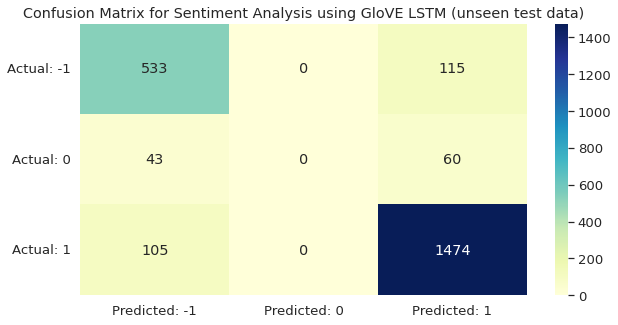

Confusion Matrix for Sentiment Analysis using GloVE LSTM (unseen test data): 0.8613733905579399
----------------------------------------------------------------------------------------------------
Classification Report for Sentiment Analysis using GloVE LSTM (unseen test data):

               precision    recall  f1-score   support

           0       0.78      0.82      0.80       648
           1       0.00      0.00      0.00       103
           2       0.89      0.93      0.91      1579

    accuracy                           0.86      2330
   macro avg       0.56      0.59      0.57      2330
weighted avg       0.82      0.86      0.84      2330

----------------------------------------------------------------------------------------------------
Negative has a accuracy of 82.25308641975309 %

Neutral has a accuracy of 0.0 %

Positive has a accuracy of 93.35022165927802 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
y_true, y_pred = get_true_pred(pred, unseen_lstm_Y_test.values)
plot_confusion_matrix(y_true, y_pred, "GloVE LSTM (unseen test data)")

## Model Comparison

In [77]:
time_taken_data = [nb_tfidf_time_list,svc_tfidf_time_list,lr_tfidf_time_list,
                    nb_w2v_time_list,svc_w2v_time_list,lr_w2v_time_list,
                    nb_d2v_time_list,svc_d2v_time_list,lr_d2v_time_list,
                    lstm_w2v_time_list,lstm_glove_time_list]

time_taken_data = pd.DataFrame(time_taken_data, columns = ["Model Name", "Time Taken for Prediction(Seconds)", "# Reviews Per Second"])
time_taken_data.head(30)

,Model Name,Time Taken for Prediction(Seconds),# Reviews Per Second
0,Naive Bayes TFIF,0.001878,1.240666e+06
1,Linear_SVC TF-IDF,0.001863,1.250509e+06
2,Logistic Regression TF-IDF,0.001387,1.680318e+06
3,Naive Bayes W2V,0.004843,4.811545e+05
4,Linear_SVC W2V,0.002388,9.756143e+05
5,Logistic Regression W2V,0.002353,9.900444e+05
6,Naive Bayes D2V,0.007434,3.134394e+05
7,Linear SVC D2V,0.001394,1.671123e+06
8,Logistic Regression D2V,0.001148,2.028800e+06
9,LSTM W2V,35.985267,6.474872e+01


In [78]:
naive_bayes_model = [naive_bayes_tfidf_score, naive_bayes_Word2Vec_score, naive_bayes_Doc2Vec_score]
linear_svc_model = [Linear_SVC_tfidf_score, Linear_SVC_Word2Vec_score, Linear_SVC_Doc2Vec_score]
logistic_regression_model = [Logistic_Regression_tfidf_score, Logistic_Regression_Word2Vec_score, Logistic_Regression_Doc2Vec_score]


unseen_naive_bayes_model = [unseen_naive_bayes_tfidf_score, unseen_naive_bayes_Word2Vec_score, unseen_naive_bayes_Doc2Vec_score]
unseen_linear_svc_model = [unseen_Linear_SVC_tfidf_score, unseen_Linear_SVC_Word2Vec_score, unseen_Linear_SVC_Doc2Vec_score]
unseen_logistic_regression_model = [unseen_Logistic_Regression_tfidf_score, unseen_Logistic_Regression_Word2Vec_score, unseen_Logistic_Regression_Doc2Vec_score]

In [79]:
def comparing_models(naive_bayes, linear_svc, logistic_regression):
    fig, axes =plt.subplots(1,3, figsize=(20,20))
    # Bag of Words classifiers
    classifiers = ["TFIDF", "Word2Vec", "Doc2Vec"]

    color_discrete_map=['red', 'yellow', 'blue']
    accuracy = naive_bayes
    axes[0].set_title("Naive Bayes")
    axes[0].set_xlabel('Text Representation')
    axes[0].set_ylabel('Accuracy')
    axes[0].bar(classifiers, accuracy, color = color_discrete_map, width=0.5)


    accuracy =  linear_svc
    axes[1].set_title('Linear SVC')
    axes[1].set_xlabel('Text Representation')
    axes[1].set_ylabel('Accuracy')
    axes[1].bar(classifiers, accuracy, color = color_discrete_map, width=0.5)


    accuracy = logistic_regression
    axes[2].set_title('Logistic Regression')
    axes[2].set_xlabel('Text Representation')
    axes[2].set_ylabel(' Unseen Test Accuracy')
    axes[2].bar(classifiers, accuracy, color = color_discrete_map, width=0.5)
    plt.show()


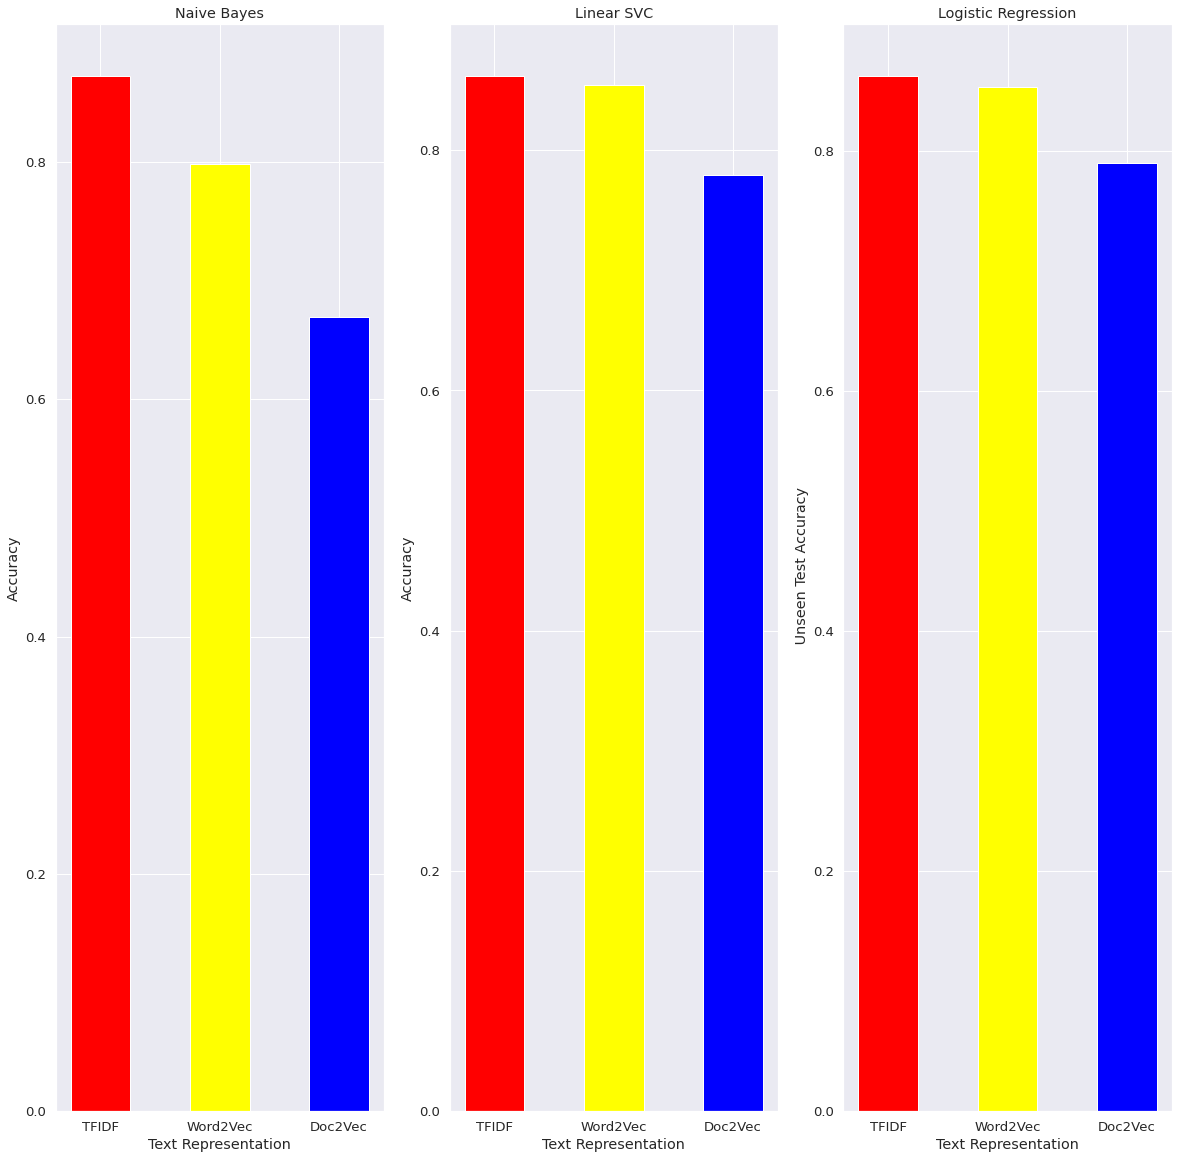

In [80]:
comparing_models(unseen_naive_bayes_model, unseen_linear_svc_model, unseen_logistic_regression_model)

# Ensemble Learning FOR TF-IDF (Voting Classifier)

In [81]:
from sklearn.ensemble import VotingClassifier
# As the TF-IDF models are the best performing, lets see if we can improve using voting classifier
estimators=[("Naive Bayes TFIDF", naive_bayes_tfidf), ("Linear SVC TFIDF", Linear_SVC_tfidf), ("Logistic Regression TFIDF", Logistic_Regression_tfidf)]
#create our voting classifier, inputting our models
tf_idf_ensemble = VotingClassifier(estimators, voting="hard")

In [82]:
tf_idf_ensemble.fit(X_train_tfidf, Y_train)
tf_idf_ensemble_file = 'trained_models/voting_tf_idf_ensemble.pkl'
joblib.dump(tf_idf_ensemble, tf_idf_ensemble_file)

['trained_models/voting_tf_idf_ensemble.pkl']

In [83]:
# TF-IDF prediction on unseen Test Set
tf_idf_pred = tf_idf_ensemble.predict(unseen_X_test_tfidf)


In [84]:
print("Ensemble Model TF-IDF accuracy:",metrics.accuracy_score(unseen_Y_test, tf_idf_pred))
Ensemble_model_tfidf_score = metrics.accuracy_score(unseen_Y_test, tf_idf_pred)

Ensemble Model TF-IDF accuracy: 0.8682403433476394


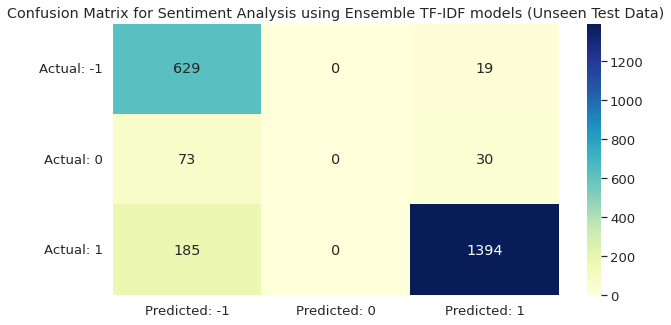

Confusion Matrix for Sentiment Analysis using Ensemble TF-IDF models (Unseen Test Data): 0.8682403433476394
----------------------------------------------------------------------------------------------------
Classification Report for Sentiment Analysis using Ensemble TF-IDF models (Unseen Test Data):

               precision    recall  f1-score   support

          -1       0.71      0.97      0.82       648
           0       0.00      0.00      0.00       103
           1       0.97      0.88      0.92      1579

    accuracy                           0.87      2330
   macro avg       0.56      0.62      0.58      2330
weighted avg       0.85      0.87      0.85      2330

----------------------------------------------------------------------------------------------------
Negative has a accuracy of 97.0679012345679 %

Neutral has a accuracy of 0.0 %

Positive has a accuracy of 88.2837238758708 %


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
plot_confusion_matrix(unseen_Y_test,  tf_idf_pred , "Ensemble TF-IDF models (Unseen Test Data)")

# Ensemble Stacking for TF-IDF (StackingClassifier)

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier

In [87]:
clf = [('Logistic Regression',Logistic_Regression_tfidf),('Naive Bayes',naive_bayes_tfidf)]
stack_model = StackingClassifier(estimators = clf, final_estimator=Linear_SVC_tfidf)


In [88]:
stack_model.fit(X_train_tfidf, Y_train)
tf_idf_stack_ensemble_file = 'trained_models/tf_idf_stack_ensemble.pkl'
joblib.dump(tf_idf_ensemble, tf_idf_stack_ensemble_file)

['trained_models/tf_idf_stack_ensemble.pkl']

In [89]:
# TF-IDF prediction on unseen Test Set
stacked_tf_idf_pred = stack_model.predict(unseen_X_test_tfidf)

In [90]:
print("Stacked model TF-IDF accuracy:",metrics.accuracy_score(unseen_Y_test, stacked_tf_idf_pred))
Stacked_model_tfidf_score = metrics.accuracy_score(unseen_Y_test, stacked_tf_idf_pred)

Stacked model TF-IDF accuracy: 0.8708154506437769


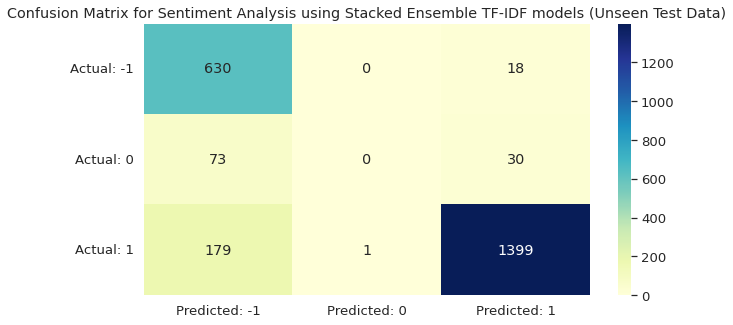

Confusion Matrix for Sentiment Analysis using Stacked Ensemble TF-IDF models (Unseen Test Data): 0.8708154506437769
----------------------------------------------------------------------------------------------------
Classification Report for Sentiment Analysis using Stacked Ensemble TF-IDF models (Unseen Test Data):

               precision    recall  f1-score   support

          -1       0.71      0.97      0.82       648
           0       0.00      0.00      0.00       103
           1       0.97      0.89      0.92      1579

    accuracy                           0.87      2330
   macro avg       0.56      0.62      0.58      2330
weighted avg       0.85      0.87      0.86      2330

----------------------------------------------------------------------------------------------------
Negative has a accuracy of 97.22222222222221 %

Neutral has a accuracy of 0.0 %

Positive has a accuracy of 88.60037998733375 %


In [91]:
plot_confusion_matrix(unseen_Y_test,  stacked_tf_idf_pred , "Stacked Ensemble TF-IDF models (Unseen Test Data)")